# Observable Trends
-----
<ul>
<li>The temperature increases as you get closer the equator. However, it peaks around 20 degrees latitude, not exactly at the equator.

<li>Cloudiness and humidity do not show a strong correlation to latitude.

<li>Wind speed appears to increase slightly the farther away from the equater you get.
</ul>

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

573

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# Create empty lists to append data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter 
record = 1

# Begin print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities
for city in cities:  
    
    # Try/except statement since not all cities have data on OpenWeatherMap
    try: 
        response = requests.get(f"{query_url}{city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record = record + 1
        
        # Wait to not exceed rate limit of API
        time.sleep(1.00)
        
    # If no record found skip to next call
    except:
        print("City not found. Skipping...")
    continue

# End print statement    
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?&q=cherskiy
Processing Record 2 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?&q=iqaluit
Processing Record 3 | Busselton
http://api.openweathermap.org/data/2.5/weather?&q=busselton
Processing Record 4 | Albany
http://api.openweathermap.org/data/2.5/weather?&q=albany
Processing Record 5 | Tocopilla
http://api.openweathermap.org/data/2.5/weather?&q=tocopilla
Processing Record 6 | Mataura
http://api.openweathermap.org/data/2.5/weather?&q=mataura
City not found. Skipping...
Processing Record 7 | Puerto Narino
http://api.openweathermap.org/data/2.5/weather?&q=puerto narino
Processing Record 8 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia
Processing Record 9 | Vanimo
http://api.openweathermap.org/data/2.5/weather?&q=vanimo
City not found. Skipping...
Processing Record 10 | Saint-Georges
http://api.openweathermap.org/data/2.5/w

Processing Record 86 | Castro
http://api.openweathermap.org/data/2.5/weather?&q=castro
Processing Record 87 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?&q=arraial do cabo
Processing Record 88 | Shar
http://api.openweathermap.org/data/2.5/weather?&q=shar
Processing Record 89 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?&q=ponta do sol
Processing Record 90 | Revelstoke
http://api.openweathermap.org/data/2.5/weather?&q=revelstoke
City not found. Skipping...
Processing Record 91 | Eskisehir
http://api.openweathermap.org/data/2.5/weather?&q=eskisehir
Processing Record 92 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?&q=port-gentil
City not found. Skipping...
Processing Record 93 | Kodiak
http://api.openweathermap.org/data/2.5/weather?&q=kodiak
Processing Record 94 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?&q=guerrero negro
Processing Record 95 | Jumla
http://api.openweathermap.org/data/2.5/weather?&q=jumla
Processing

Processing Record 172 | San Jeronimo
http://api.openweathermap.org/data/2.5/weather?&q=san jeronimo
Processing Record 173 | Talnakh
http://api.openweathermap.org/data/2.5/weather?&q=talnakh
City not found. Skipping...
Processing Record 174 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?&q=fairbanks
Processing Record 175 | Dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson
Processing Record 176 | Touros
http://api.openweathermap.org/data/2.5/weather?&q=touros
Processing Record 177 | Jutai
http://api.openweathermap.org/data/2.5/weather?&q=jutai
Processing Record 178 | Nicoya
http://api.openweathermap.org/data/2.5/weather?&q=nicoya
City not found. Skipping...
Processing Record 179 | Idritsa
http://api.openweathermap.org/data/2.5/weather?&q=idritsa
Processing Record 180 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?&q=cap malheureux
City not found. Skipping...
Processing Record 181 | Provideniya
http://api.openweathermap.org/data/2.5/weather?&q=pr

Processing Record 257 | Hailey
http://api.openweathermap.org/data/2.5/weather?&q=hailey
Processing Record 258 | Mlimba
http://api.openweathermap.org/data/2.5/weather?&q=mlimba
Processing Record 259 | Fort Saint James
http://api.openweathermap.org/data/2.5/weather?&q=fort saint james
Processing Record 260 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?&q=sao joao da barra
Processing Record 261 | Mweka
http://api.openweathermap.org/data/2.5/weather?&q=mweka
Processing Record 262 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?&q=klaksvik
Processing Record 263 | Mubi
http://api.openweathermap.org/data/2.5/weather?&q=mubi
Processing Record 264 | Petropavlovka
http://api.openweathermap.org/data/2.5/weather?&q=petropavlovka
Processing Record 265 | Hamirpur
http://api.openweathermap.org/data/2.5/weather?&q=hamirpur
Processing Record 266 | Khorixas
http://api.openweathermap.org/data/2.5/weather?&q=khorixas
Processing Record 267 | Puerto Carreno
http://api.openweat

City not found. Skipping...
Processing Record 342 | Flinders
http://api.openweathermap.org/data/2.5/weather?&q=flinders
Processing Record 343 | Nuuk
http://api.openweathermap.org/data/2.5/weather?&q=nuuk
Processing Record 344 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?&q=maniitsoq
Processing Record 345 | Namibe
http://api.openweathermap.org/data/2.5/weather?&q=namibe
Processing Record 346 | Bundaberg
http://api.openweathermap.org/data/2.5/weather?&q=bundaberg
Processing Record 347 | Toccoa
http://api.openweathermap.org/data/2.5/weather?&q=toccoa
Processing Record 348 | Nara
http://api.openweathermap.org/data/2.5/weather?&q=nara
Processing Record 349 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?&q=rio grande
City not found. Skipping...
Processing Record 350 | Sekoma
http://api.openweathermap.org/data/2.5/weather?&q=sekoma
Processing Record 351 | Tamandare
http://api.openweathermap.org/data/2.5/weather?&q=tamandare
Processing Record 352 | Grand Gaube
http:/

City not found. Skipping...
Processing Record 428 | Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?&q=marsa matruh
Processing Record 429 | Cairns
http://api.openweathermap.org/data/2.5/weather?&q=cairns
Processing Record 430 | Hyeres
http://api.openweathermap.org/data/2.5/weather?&q=hyeres
Processing Record 431 | Guanica
http://api.openweathermap.org/data/2.5/weather?&q=guanica
Processing Record 432 | Jining
http://api.openweathermap.org/data/2.5/weather?&q=jining
Processing Record 433 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?&q=port augusta
Processing Record 434 | Palmer
http://api.openweathermap.org/data/2.5/weather?&q=palmer
Processing Record 435 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?&q=haines junction
Processing Record 436 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?&q=coquimbo
Processing Record 437 | Sabang
http://api.openweathermap.org/data/2.5/weather?&q=sabang
Processing Record 438 | Thompson
http://api.

Processing Record 514 | Belawan
http://api.openweathermap.org/data/2.5/weather?&q=belawan
Processing Record 515 | Odda
http://api.openweathermap.org/data/2.5/weather?&q=odda
Processing Record 516 | Dahra
http://api.openweathermap.org/data/2.5/weather?&q=dahra
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary
data_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(data_dict)

# Display count of weather data values 
weather_data.count()

City          516
Cloudiness    516
Country       516
Date          516
Humidity      516
Lat           516
Lng           516
Max Temp      516
Wind Speed    516
dtype: int64

In [8]:
# Save data frame to CSV
weather_data.to_csv("output_data/cities.csv")

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cherskiy,69,RU,1558564004,78,68.75,161.30,33.89,8.97
1,Iqaluit,75,CA,1558564005,86,63.75,-68.52,37.40,19.46
2,Busselton,90,AU,1558564006,70,-33.64,115.35,48.00,13.94
3,Albany,75,US,1558563745,30,42.65,-73.75,71.01,4.70
4,Tocopilla,0,CL,1558563948,85,-22.09,-70.20,63.59,19.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

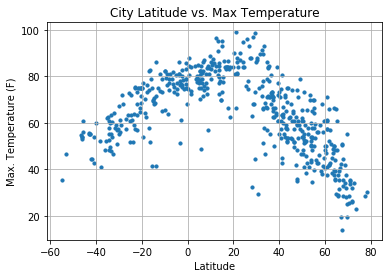

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

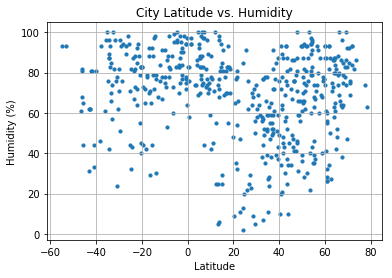

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

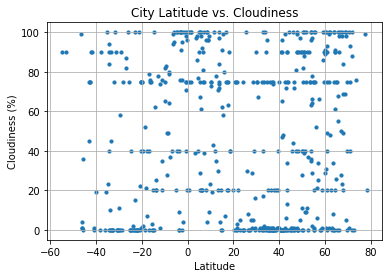

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

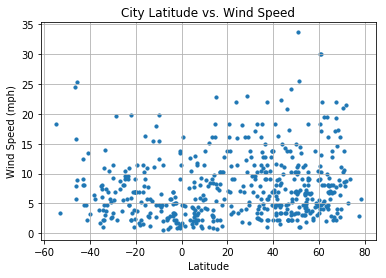

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()